In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('data_boy_clean_all.csv', encoding='gbk')
df.head()

,序号,孕妇代码,年龄,身高,体重,末次月经,IVF妊娠,检测日期,检测抽血次数,检测孕周,...,X染色体浓度,13号染色体的GC含量,18号染色体的GC含量,21号染色体的GC含量,被过滤掉读段数的比例,染色体的非整倍体,怀孕次数,生产次数,胎儿是否健康,检测孕周_周数
0,1,A001,31,160.0,72.0,2023/2/1,1,20230429,1,11w+6,...,0.038061,0.377069,0.389803,0.399399,0.027484,NaN,1,0,1,11.857143
1,2,A001,31,160.0,73.0,2023/2/1,1,20230531,2,15w+6,...,0.059572,0.371542,0.384771,0.391706,0.019617,NaN,1,0,1,15.857143
2,3,A001,31,160.0,73.0,2023/2/1,1,20230625,3,20w+1,...,0.075995,0.377449,0.390582,0.399480,0.022312,NaN,1,0,1,20.142857
3,4,A001,31,160.0,74.0,2023/2/1,1,20230716,4,22w+6,...,0.052305,0.375613,0.389251,0.397212,0.023280,NaN,1,0,1,22.857143
4,5,A002,32,149.0,74.0,2023/11/9,1,20240219,1,13w+6,...,0.059708,0.380260,0.393618,0.404868,0.024212,NaN,2,1,0,13.857143


In [2]:
df = df[['孕妇代码', '孕妇BMI', 'Y染色体浓度', '检测孕周_周数', '胎儿是否健康']]
df.head(10)
df['BMI_等频分组'] = pd.qcut(df['孕妇BMI'], q=5, labels=False, duplicates='drop') # 等频分
df_sorted = df.sort_values(by='BMI_等频分组') # 排序
df_sorted # 得到分组集合

"""K-Means聚类分析，发现不适用后注释"""
# import pandas as pd
# import numpy as np
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler
# import matplotlib.pyplot as plt
# import seaborn as sns
# from scipy.stats import gaussian_kde
#
# # 假设你的DataFrame叫 df
# # 提取需要聚类的特征
# X = df[['孕妇BMI', 'Y染色体浓度']].values
#
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X) # 同时计算均值和标准差并进行转换
#
# # 创建K-Means模型，设置聚类数为5
# kmeans = KMeans(n_clusters=5, random_state=42)
#
# # 拟合模型
# kmeans.fit(X_scaled)
# # 获取聚类标签 (0, 1, 2, 3, 4)
# cluster_labels = kmeans.labels_
#
# # 将聚类结果作为新列添加回DataFrame
# df['KMeans_Cluster'] = cluster_labels
# df_sorted = df.sort_values(by='KMeans_Cluster')
# # (可选) 查看每个簇的大小
# print(df['KMeans_Cluster'].value_counts().sort_index())
#
# # (可选) 查看聚类中心点 (在标准化后的空间里)
# print("Cluster centers (scaled):")
# print(kmeans.cluster_centers_)
#
# # (可选) 如果你想看原始尺度上的中心点大致位置，可以逆转换
# # 注意：这只是一个近似，因为逆转换后的中心点不一定完全代表原始簇的中心
# centers_original_scale = scaler.inverse_transform(kmeans.cluster_centers_)
# print("\nApproximate cluster centers in original scale:")
# print(pd.DataFrame(centers_original_scale, columns=['孕妇BMI', 'Y染色体浓度']))
#
# # 设置中文字体支持（如果需要）
# plt.rcParams['font.sans-serif'] = ['SimHei']
# plt.rcParams['axes.unicode_minus'] = False
#
# # 创建图形和子图
# fig = plt.figure(figsize=(12, 10))
#
# # 使用GridSpec创建复杂的子图布局
# gs = plt.GridSpec(4, 4)
#
# # 主散点图
# ax_scatter = fig.add_subplot(gs[1:4, 0:3])
# scatter = ax_scatter.scatter(df['孕妇BMI'], df['Y染色体浓度'], c=df['KMeans_Cluster'], cmap='viridis', alpha=0.6)
# plt.colorbar(scatter, ax=ax_scatter, label='Cluster ID')
# ax_scatter.set_xlabel('孕妇BMI')
# ax_scatter.set_ylabel('Y染色体浓度')
# ax_scatter.set_title('K-Means Clustering (k=5) of 孕妇BMI and Y染色体浓度')
# ax_scatter.grid(True, alpha=0.3)
#
# # BMI的分布直方图（顶部）
# ax_hist_x = fig.add_subplot(gs[0, 0:3], sharex=ax_scatter)
# bmi_values = df['孕妇BMI'].values
# ax_hist_x.hist(bmi_values, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')
# # 添加BMI的核密度估计曲线
# bmi_density = gaussian_kde(bmi_values)
# bmi_xs = np.linspace(min(bmi_values), max(bmi_values), 200)
# ax_hist_x.plot(bmi_xs, bmi_density(bmi_xs), 'r-', linewidth=2)
# ax_hist_x.set_ylabel('密度')
# ax_hist_x.set_title('BMI分布')
# ax_hist_x.grid(True, alpha=0.3)
#
# # Y染色体浓度的分布直方图（右侧）
# ax_hist_y = fig.add_subplot(gs[1:4, 3], sharey=ax_scatter)
# y_chr_values = df['Y染色体浓度'].values
# ax_hist_y.hist(y_chr_values, bins=30, density=True, alpha=0.7, color='lightgreen',
#                edgecolor='black', orientation='horizontal')
# # 添加Y染色体浓度的核密度估计曲线
# y_density = gaussian_kde(y_chr_values)
# y_ys = np.linspace(min(y_chr_values), max(y_chr_values), 200)
# ax_hist_y.plot(y_density(y_ys), y_ys, 'r-', linewidth=2)
# ax_hist_y.set_xlabel('密度')
# ax_hist_y.set_title('Y染色体浓度分布')
# ax_hist_y.grid(True, alpha=0.3)
#
# # 隐藏不需要的刻度标签
# plt.setp(ax_hist_x.get_xticklabels(), visible=False)
# plt.setp(ax_hist_y.get_yticklabels(), visible=False)
#
# plt.tight_layout()
# plt.savefig("sovle_2_BMI分组_K-Means.png", dpi=600, bbox_inches='tight')
# plt.show()
#
# # 单独绘制所有数据的分布曲线（如果需要）
# plt.figure(figsize=(12, 5))
#
# # BMI分布
# plt.subplot(1, 2, 1)
# plt.hist(bmi_values, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black', label='BMI分布')
# plt.plot(bmi_xs, bmi_density(bmi_xs), 'r-', linewidth=2, label='核密度估计')
# plt.xlabel('孕妇BMI')
# plt.ylabel('密度')
# plt.title('BMI分布曲线')
# plt.legend()
# plt.grid(True, alpha=0.3)
#
# # Y染色体浓度分布
# plt.subplot(1, 2, 2)
# plt.hist(y_chr_values, bins=30, density=True, alpha=0.7, color='lightgreen', edgecolor='black', label='Y染色体浓度分布')
# plt.plot(y_density(y_ys), y_ys, 'r-', linewidth=2, label='核密度估计')
# plt.xlabel('密度')
# plt.ylabel('Y染色体浓度')
# plt.title('Y染色体浓度分布曲线')
# plt.legend()
# plt.grid(True, alpha=0.3)
#
# plt.tight_layout()
# plt.savefig("sovle_2_分布曲线.png", dpi=600, bbox_inches='tight')
# plt.show()

'K-Means聚类分析，发现不适用后注释'

In [3]:
df_sorted.groupby(by='BMI_等频分组')['孕妇代码'].count() # 分组统计
df_sorted.groupby(by='BMI_等频分组')['孕妇BMI'].min ()
df_sorted.groupby(by='BMI_等频分组')['孕妇BMI'].max ()

BMI_等频分组
0    29.955556
1    31.164139
2    32.653061
3    34.428155
4    46.875000
Name: 孕妇BMI, dtype: float64

In [4]:
df_sorted['Y是否可检测'] = np.where(df_sorted['Y染色体浓度'] < 0.04, 0, 1)
x = df_sorted[['Y是否可检测', '检测孕周_周数', 'BMI_等频分组']]
x

,Y是否可检测,检测孕周_周数,BMI_等频分组
0,0,11.857143,0
199,1,12.285714,0
200,1,16.714286,0
201,1,20.000000,0
202,1,23.857143,0
...,...,...,...
142,1,13.285714,4
143,0,17.285714,4
144,1,21.142857,4
789,1,15.714286,4


Optimization terminated successfully.
         Current function value: 0.371729
         Iterations 6

BMI分组 0 的Logistic回归结果:
                           Logit Regression Results                           
Dep. Variable:                 Y是否可检测   No. Observations:                  217
Model:                          Logit   Df Residuals:                      215
Method:                           MLE   Df Model:                            1
Date:                Sun, 07 Sep 2025   Pseudo R-squ.:                 0.01043
Time:                        21:38:24   Log-Likelihood:                -80.665
converged:                       True   LL-Null:                       -81.516
Covariance Type:            nonrobust   LLR p-value:                    0.1922
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7666      0.948      0.809      0.419      -1.091       2.624
检测孕周_

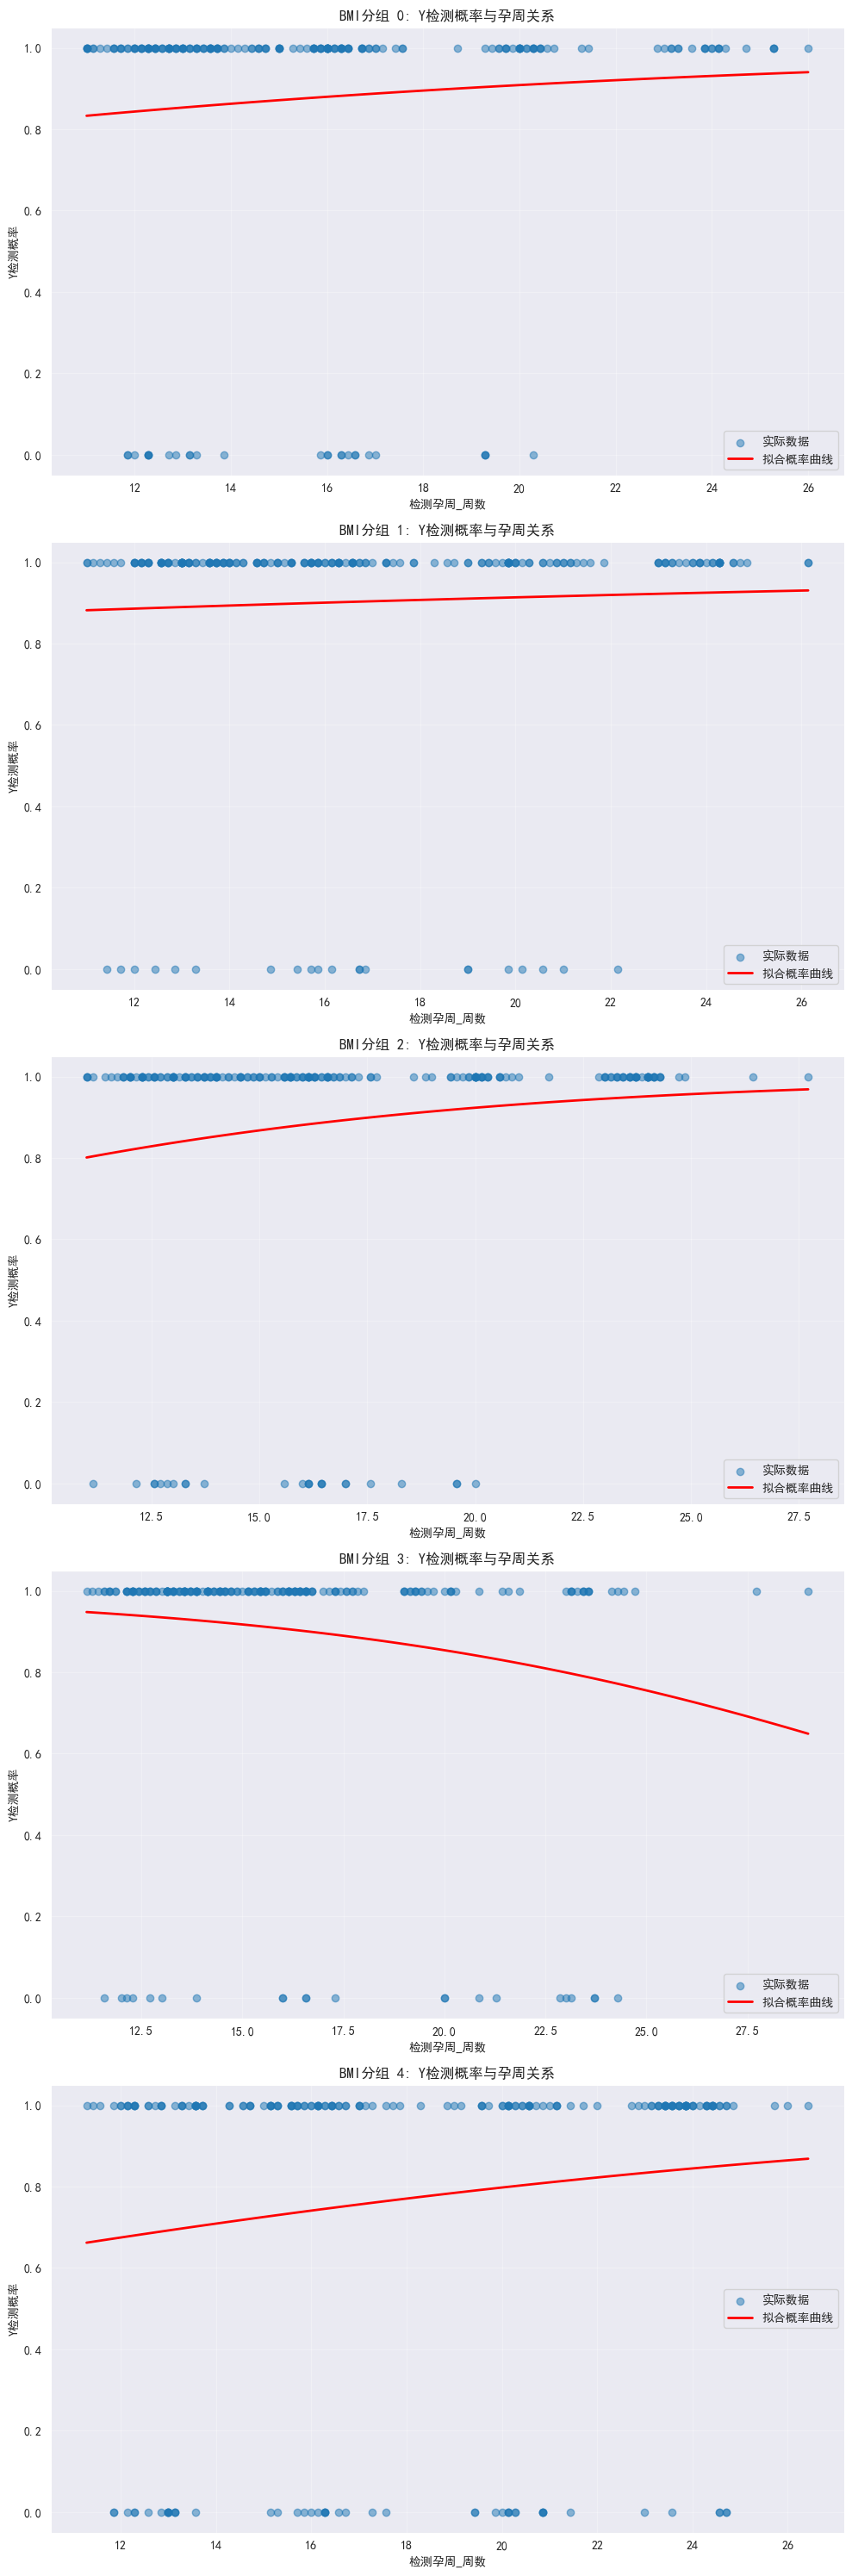

In [5]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import os

# 设置全局字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

# 创建Y是否可检测列
df_sorted['Y是否可检测'] = np.where(df_sorted['Y染色体浓度'] < 0.04, 0, 1)

# 正确选择多列
x = df_sorted[['Y是否可检测', '检测孕周_周数', 'BMI_等频分组']]

# 获取唯一的BMI分组
bmi_groups = df_sorted['BMI_等频分组'].unique()
bmi_groups.sort()



# 为每个BMI分组创建子图
fig, axes = plt.subplots(len(bmi_groups), 1, figsize=(10, 6*len(bmi_groups)))
if len(bmi_groups) == 1:
    axes = [axes]

# 存储每个组的模型结果
models = {}

for i, group in enumerate(bmi_groups):
    # 提取当前分组的数据
    group_data = df_sorted[df_sorted['BMI_等频分组'] == group]

    # 准备自变量和因变量
    X_var = group_data['检测孕周_周数']
    y_var = group_data['Y是否可检测']

    # 添加常数项（截距）
    X_var = sm.add_constant(X_var)

    # 创建并拟合Logistic回归模型
    model = sm.Logit(y_var, X_var)
    result = model.fit()
    models[group] = result

    # 打印模型摘要
    print(f"\nBMI分组 {group} 的Logistic回归结果:")
    print(result.summary())

    # 生成预测概率
    X_pred = np.linspace(X_var['检测孕周_周数'].min(), X_var['检测孕周_周数'].max(), 100)
    X_pred_const = sm.add_constant(X_pred)
    y_pred = result.predict(X_pred_const)

    # 绘制散点图和拟合曲线
    axes[i].scatter(group_data['检测孕周_周数'], group_data['Y是否可检测'],
                   alpha=0.5, label='实际数据')
    axes[i].plot(X_pred, y_pred, color='red', linewidth=2, label='拟合概率曲线')
    axes[i].set_xlabel('检测孕周_周数')
    axes[i].set_ylabel('Y检测概率')
    axes[i].set_title(f'BMI分组 {group}: Y检测概率与孕周关系')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

    # 保存当前子图为单独的高分辨率图像
    plt.figure(figsize=(10, 6))
    plt.scatter(group_data['检测孕周_周数'], group_data['Y是否可检测'],
               alpha=0.5, label='实际数据')
    plt.plot(X_pred, y_pred, color='red', linewidth=2, label='拟合概率曲线')
    plt.xlabel('检测孕周_周数')
    plt.ylabel('Y检测概率')
    plt.title(f'BMI分组 {group}: Y检测概率与孕周关系')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.savefig(f"sovle_2_BMI分组_{group}_Logistic回归.png",
               dpi=600, bbox_inches='tight')
    plt.close()

plt.tight_layout()
plt.show()

plt.close()


各分组最佳检测时点计算结果:
分组 0:
  参数: α=0.7666, β=0.0764
  最佳检测时点: 84.00000 天 (12.00000 周)
  此时达标概率: 0.9992
  最小综合损失: 6.0632
  计算方法: Brent
分组 1:
  参数: α=1.5851, β=0.0386
  最佳检测时点: 125.32370 天 (17.90339 周)
  此时达标概率: 0.9984
  最小综合损失: 33.6363
  计算方法: Brent
分组 2:
  参数: α=0.0548, β=0.1216
  最佳检测时点: 84.00000 天 (12.00000 周)
  此时达标概率: 1.0000
  最小综合损失: 0.2775
  计算方法: Brent
分组 3:
  参数: α=4.3277, β=-0.1280
  最佳检测时点: 70.00000 天 (10.00000 周)
  此时达标概率: 0.0096
  最小综合损失: 7922.8917
  计算方法: 边界检查
分组 4:
  参数: α=-0.2322, β=0.0802
  最佳检测时点: 92.11660 天 (13.15951 周)
  此时达标概率: 0.9992
  最小综合损失: 10.2976
  计算方法: Brent
已保存图片: sovle_2_BMI分组_0_损失函数曲线.png


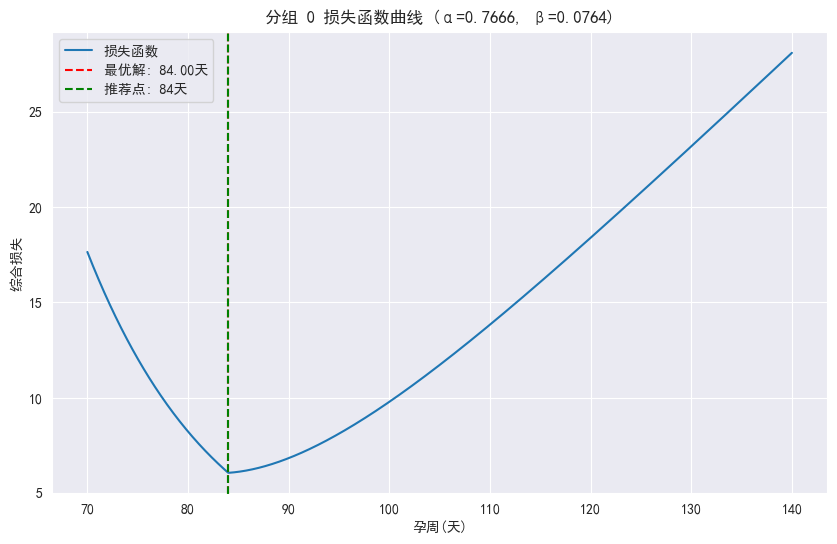

已保存图片: sovle_2_BMI分组_1_损失函数曲线.png


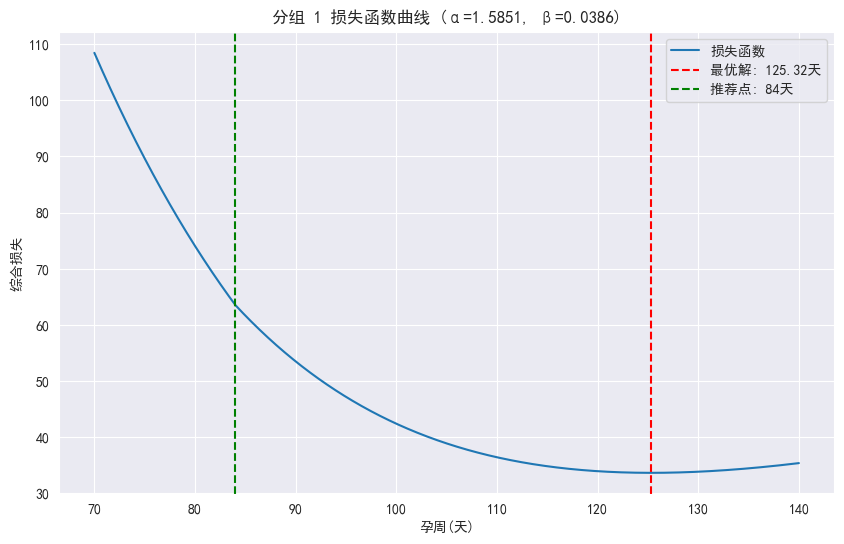

已保存图片: sovle_2_BMI分组_2_损失函数曲线.png


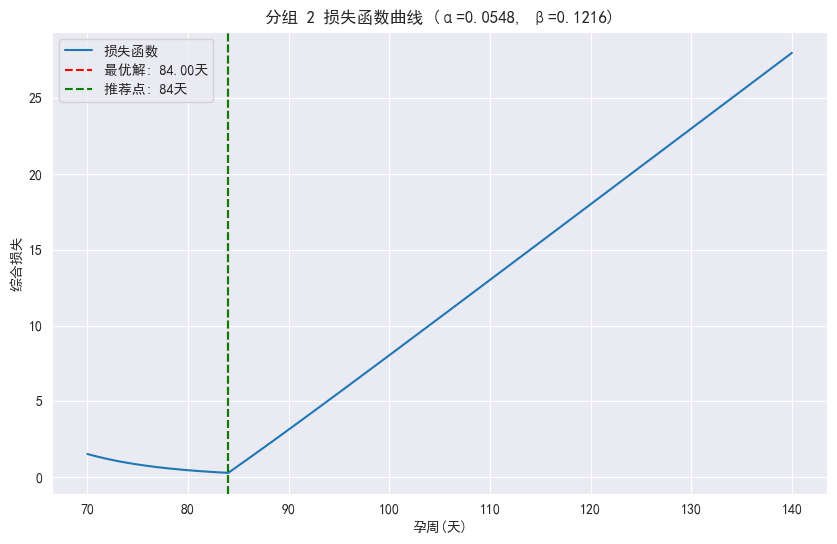

已保存图片: sovle_2_BMI分组_3_损失函数曲线.png


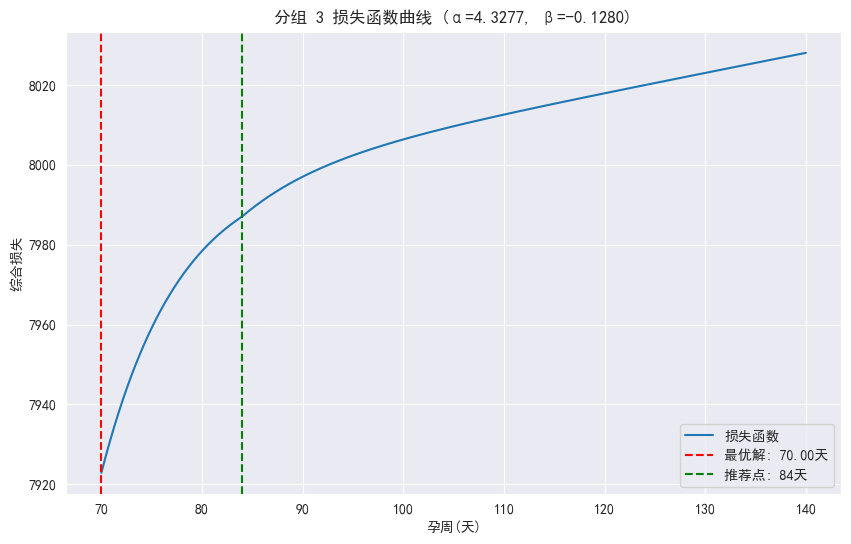

已保存图片: sovle_2_BMI分组_4_损失函数曲线.png


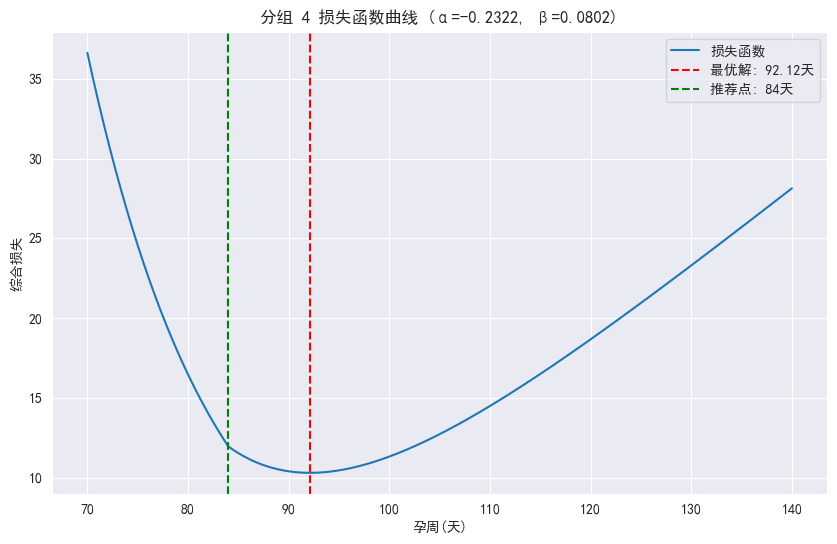

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar, differential_evolution

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 定义概率函数
def probability_function(t, alpha, beta):
    z = alpha + beta * t
    if z < -500:
        return 0.0
    elif z > 500:
        return 1.0
    else:
        return 1 / (1 + np.exp(-z))

# 定义未达标风险函数
def risk_function(t, alpha, beta):
    return 1 - probability_function(t, alpha, beta)

# 定义检测延迟函数
def delay_function(t, t0=84):
    return np.maximum(0, t - t0)

# 定义综合损失函数 L
def loss_function(t, alpha, beta, w_u, w_d, t0=84):
    risk = risk_function(t, alpha, beta)
    delay = delay_function(t, t0)
    return w_u * risk + w_d * delay

# 设置权重参数
w_u = 8000
w_d = 0.5
t0 = 84
t_min = 70
t_max = 140

params = {
    0: (0.7666, 0.0764),
    1: (1.5851, 0.0386),
    2: (0.0548, 0.1216),
    3: (4.3277, -0.1280),
    4: (-0.2322, 0.0802)
}

# 计算最佳检测时点
best_times = {}
optimization_methods = {}

for group, (alpha, beta) in params.items():
    def loss_to_minimize(t):
        return loss_function(t, alpha, beta, w_u, w_d, t0)

    if beta < 0:
        # β<0时，最优解通常在边界，直接检查边界和t0
        t_candidates = [t_min, t0]
        losses = [loss_to_minimize(t) for t in t_candidates]
        best_idx = np.argmin(losses)
        best_times[group] = t_candidates[best_idx]
        optimization_methods[group] = '边界检查'
    else:
        # β>0时，使用更适合全局优化的方法
        try:
            # 尝试使用Brent方法
            result = minimize_scalar(
                loss_to_minimize,
                bounds=(t_min, t_max),
                method='bounded',
                options={'xatol': 1e-8, 'maxiter': 1000}
            )
            if result.success:
                best_times[group] = result.x
                optimization_methods[group] = 'Brent'
            else:
                # 如果失败，使用差分进化算法
                result = differential_evolution(
                    loss_to_minimize,
                    bounds=[(t_min, t_max)],
                    strategy='best1bin',
                    popsize=15,
                    tol=1e-8,
                    mutation=(0.5, 1),
                    recombination=0.7
                )
                best_times[group] = result.x[0]
                optimization_methods[group] = '差分进化'
        except:
            # 最后备选方案：精细网格搜索
            t_values = np.linspace(t_min, t_max, 5000)
            loss_values = [loss_to_minimize(t) for t in t_values]
            best_idx = np.argmin(loss_values)
            best_times[group] = t_values[best_idx]
            optimization_methods[group] = '精细网格搜索'

print("各分组最佳检测时点计算结果:")
for group in best_times:
    alpha, beta = params[group]
    best_t = best_times[group]
    best_prob = probability_function(best_t, alpha, beta)
    best_loss = loss_function(best_t, alpha, beta, w_u, w_d, t0)
    method = optimization_methods.get(group, '未知')

    print(f"分组 {group}:")
    print(f"  参数: α={alpha:.4f}, β={beta:.4f}")
    print(f"  最佳检测时点: {best_t:.5f} 天 ({best_t/7:.5f} 周)")
    print(f"  此时达标概率: {best_prob:.4f}")
    print(f"  最小综合损失: {best_loss:.4f}")
    print(f"  计算方法: {method}")

# 可视化损失函数曲线
for group, (alpha, beta) in params.items():
    best_t = best_times[group]

    t_values = np.linspace(t_min, t_max, 1000)
    loss_values = [loss_function(t, alpha, beta, w_u, w_d, t0) for t in t_values]

    plt.figure(figsize=(10, 6))
    plt.plot(t_values, loss_values, label='损失函数')
    plt.axvline(x=best_t, color='r', linestyle='--', label=f'最优解: {best_t:.2f}天')
    plt.axvline(x=t0, color='g', linestyle='--', label=f'推荐点: {t0}天')
    plt.xlabel('孕周(天)')
    plt.ylabel('综合损失')
    plt.title(f'分组 {group} 损失函数曲线 (α={alpha:.4f}, β={beta:.4f})')
    plt.legend()
    plt.grid(True)
    filename = f'sovle_2_BMI分组_{group}_损失函数曲线.png'
    plt.savefig(filename, dpi=600, bbox_inches='tight')  # 高分辨率保存[1,3](@ref)
    print(f"已保存图片: {filename}")
    plt.show()
